Soil Quality Summary Statistics:


,Sample_ID,pH,Water_Holding_Capacity,EC
count,20.00,20.00,20.00,20.00
mean,10.50,6.46,30.96,5.60
std,5.92,0.60,11.12,4.56
min,1.00,5.50,14.50,1.00
25%,5.75,5.98,20.75,2.17
50%,10.50,6.45,31.25,4.30
75%,15.25,6.93,40.50,7.38
max,20.00,7.50,50.00,16.50



Soil Quality Assessment Summary:


,Sample_ID,pH,pH_Status,EC,Salinity_Level,Soil_Texture,Water_Holding_Capacity
0,1,5.500000,Needs Adjustment,1.800000,Non-saline,Sandy,15.200000
1,2,6.200000,Optimal,2.500000,Slightly saline,Loamy,33.000000
2,3,7.100000,Needs Adjustment,5.500000,Moderately saline,Clayey,45.500000
3,4,6.000000,Optimal,3.500000,Slightly saline,Sandy,20.000000
4,5,6.500000,Optimal,7.000000,Moderately saline,Loamy,30.000000
5,6,7.500000,Needs Adjustment,8.500000,Strongly saline,Clayey,50.000000
6,7,5.800000,Needs Adjustment,1.200000,Non-saline,Loamy,28.000000
7,8,6.800000,Optimal,12.000000,Strongly saline,Sandy,18.000000
8,9,7.200000,Needs Adjustment,16.500000,Very strongly saline,Clayey,42.000000
9,10,5.900000,Needs Adjustment,1.500000,Non-saline,Sandy,14.500000


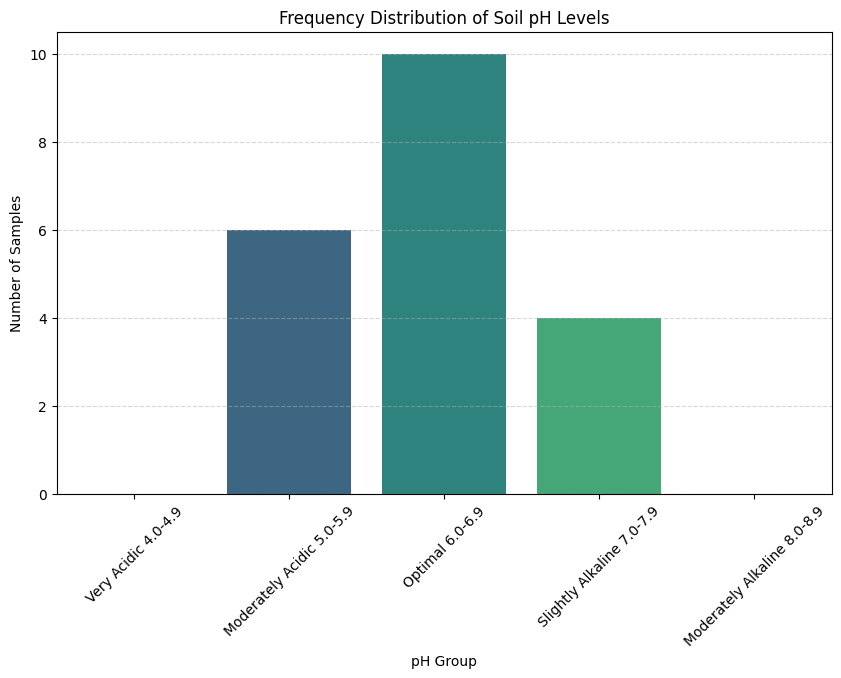

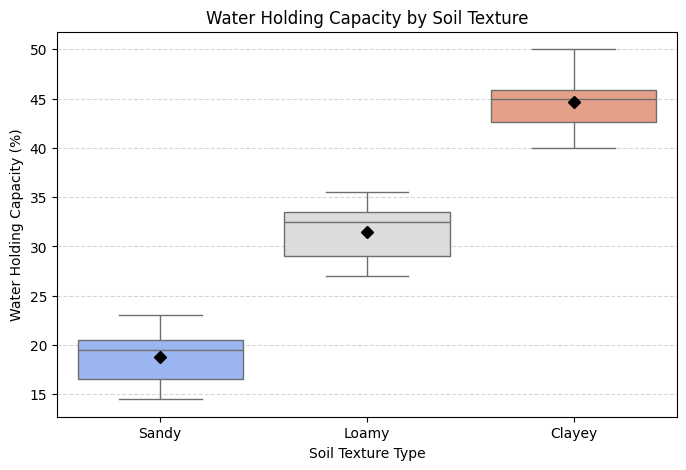


Soil Quality Assessment Summary:


,Sample_ID,pH,Salinity_Level,Soil_Quality
0,1,5.5,Non-saline,Needs Improvement
1,2,6.2,Slightly saline,Good Quality
2,3,7.1,Moderately saline,Needs Improvement
3,4,6.0,Slightly saline,Good Quality
4,5,6.5,Moderately saline,Needs Improvement
5,6,7.5,Strongly saline,Needs Improvement
6,7,5.8,Non-saline,Needs Improvement
7,8,6.8,Strongly saline,Needs Improvement
8,9,7.2,Very strongly saline,Needs Improvement
9,10,5.9,Non-saline,Needs Improvement


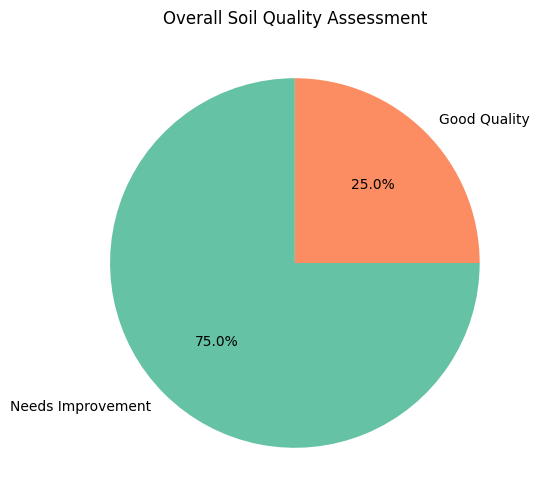

In [18]:
# นำเข้าไลบรารีที่จำเป็นสำหรับการวิเคราะห์ข้อมูลและสร้างแผนภูมิ
import pandas as pd  # ไลบรารีสำหรับจัดการข้อมูลในรูปแบบ DataFrame
import matplotlib.pyplot as plt  # ไลบรารีสำหรับสร้างแผนภูมิแบบกราฟิก
import seaborn as sns  # ไลบรารีสำหรับสร้างแผนภูมิที่สวยงามและมีความละเอียดสูง

# โหลดไฟล์ข้อมูล CSV (แก้ไข path ตามที่อยู่ของไฟล์)
file_path = '/content/soil_quality_data_with_ec_updated.csv'  # กำหนดที่อยู่ของไฟล์ข้อมูล

# โหลดข้อมูลจากไฟล์ CSV เข้าสู่ DataFrame
df = pd.read_csv(file_path)  # ใช้ pandas อ่านข้อมูลจากไฟล์ CSV และเก็บใน DataFrame

# แสดงสถิติเบื้องต้นของข้อมูล
df_summary = df.describe().round(2)  # คำนวณค่าสถิติเบื้องต้น เช่น ค่าเฉลี่ย ค่าต่ำสุด ค่าสูงสุด
print("Soil Quality Summary Statistics:")
display(df_summary)  # แสดงข้อมูลสรุปผลเป็นตาราง


# กำหนดช่วงค่า pH ที่เหมาะสม และจัดกลุ่มค่า pH
ideal_ph_range = (6.0, 7.0)  # ดินที่เหมาะสมควรมีค่า pH อยู่ในช่วง 6.0 - 7.0

# ตรวจสอบค่า pH และกำหนดสถานะของดิน
# หากค่า pH อยู่ในช่วงที่เหมาะสม ให้กำหนดเป็น 'Optimal' มิฉะนั้นเป็น 'Needs Adjustment'
df['pH_Status'] = df['pH'].apply(lambda x: 'Optimal' if ideal_ph_range[0] <= x <= ideal_ph_range[1] else 'Needs Adjustment')

# ฟังก์ชันสำหรับจัดประเภทของความเค็มในดิน (Salinity Level) ตามค่า EC
def classify_salinity(ec):
    if ec < 2:
        return 'Non-saline'  # ดินไม่มีความเค็ม
    elif 2 <= ec < 4:
        return 'Slightly saline'  # ดินมีความเค็มเล็กน้อย
    elif 4 <= ec < 8:
        return 'Moderately saline'  # ดินมีความเค็มปานกลาง
    elif 8 <= ec <= 16:
        return 'Strongly saline'  # ดินมีความเค็มสูง
    else:
        return 'Very strongly saline'  # ดินมีความเค็มสูงมาก

# นำฟังก์ชัน classify_salinity มาใช้กับคอลัมน์ EC เพื่อจัดประเภทความเค็มของดิน
df['Salinity_Level'] = df['EC'].apply(classify_salinity)

# สรุปผลข้อมูลในรูปแบบตารางที่เลือกเฉพาะคอลัมน์สำคัญ
summary_table = df[['Sample_ID', 'pH', 'pH_Status', 'EC', 'Salinity_Level', 'Soil_Texture', 'Water_Holding_Capacity']]
print("\nSoil Quality Assessment Summary:")
display(summary_table.style.set_properties(**{'text-align': 'center'}))  # แสดงข้อมูลสรุปเป็นตาราง


# === การสร้างแผนภูมิ ===

# แผนภูมิที่ 1: การแจกแจงความถี่ของค่า pH
ph_bins = [4.0, 5.0, 6.0, 7.0, 8.0, 9.0]  # กำหนดช่วงของค่า pH
ph_labels = ["Very Acidic 4.0-4.9", 'Moderately Acidic 5.0-5.9',
             'Optimal 6.0-6.9', 'Slightly Alkaline 7.0-7.9', 'Moderately Alkaline 8.0-8.9']  # ป้ายชื่อกลุ่มค่า pH

# จัดกลุ่มค่า pH และคำนวณจำนวนตัวอย่างในแต่ละกลุ่ม
df['pH_Group'] = pd.cut(df['pH'], bins=ph_bins, labels=ph_labels, include_lowest=True)
ph_group_counts = df['pH_Group'].value_counts().sort_index()

# สร้างกราฟแท่งแสดงการกระจายของค่า pH
plt.figure(figsize=(10, 6))
sns.barplot(x=ph_group_counts.index, y=ph_group_counts.values, hue=ph_group_counts.index, palette='viridis', legend=False)
plt.xlabel('pH Group')
plt.ylabel('Number of Samples')
plt.title('Frequency Distribution of Soil pH Levels')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# แผนภูมิที่ 2: ความสามารถในการอุ้มน้ำของดินตามเนื้อดิน
plt.figure(figsize=(8, 5))
sns.boxplot(x='Soil_Texture', y='Water_Holding_Capacity', hue='Soil_Texture',
            data=df, palette='coolwarm', showmeans=True,
            meanprops={"marker":"D", "markerfacecolor":"black", "markeredgecolor":"black"})
plt.xlabel('Soil Texture Type')
plt.ylabel('Water Holding Capacity (%)')
plt.title('Water Holding Capacity by Soil Texture')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# ฟังก์ชันประเมินคุณภาพของดินในแต่ละตัวอย่าง
def assess_soil_quality(row):
    if (6.0 <= row['pH'] <= 7.0) and (row['Salinity_Level'] in ['Non-saline', 'Slightly saline']):
        return 'Good Quality'  # ดินที่มีค่า pH เหมาะสมและความเค็มต่ำ
    else:
        return 'Needs Improvement'  # ดินที่ต้องปรับปรุงคุณภาพ

# ใช้ฟังก์ชันเพื่อประเมินคุณภาพของดินในแต่ละตัวอย่าง
df['Soil_Quality'] = df.apply(assess_soil_quality, axis=1)

# สรุปจำนวนตัวอย่างดินที่มีคุณภาพดีและต้องปรับปรุง
quality_summary = df['Soil_Quality'].value_counts()
print("\nSoil Quality Assessment Summary:")
display(df[['Sample_ID', 'pH', 'Salinity_Level', 'Soil_Quality']])

# สร้างแผนภูมิแสดงสัดส่วนคุณภาพดิน
plt.figure(figsize=(6, 6))
plt.pie(quality_summary, labels=quality_summary.index, autopct='%1.1f%%', startangle=90, colors=['#66c2a5','#fc8d62'])
plt.title('Overall Soil Quality Assessment')
plt.show()


